# Do debates matter?

Presidential debates provide a national platform for U.S. presidential candidates to introduce their polices, take stances on controversial issues, and sometimes take down their opponents. This year has seen many memorable moments from [five Democratic primary debates](https://en.wikipedia.org/wiki/2020_Democratic_Party_presidential_debates_and_forums). Some are shocking: But for Kamala Harris's ["bus story"](https://www.nytimes.com/2019/06/30/us/politics/kamala-harris-berkeley-busing.html), many wouldn't have thought of Joe Biden's pro-segregation past — the same Joe whom Barack Obama chose as his vice president and a beloved candidate among the Black community. Some are inspiring: When confronted about her progressive policies, Elizabeth Warren fought back, "Why run for president just to say what we really can't do and shouldn't fight for?" 

**Does debate performance actually make or break candidates?** On the one hand, Biden remains popular despite his questionable past resurfacing, frequent rambling, and occasional ["record player"](https://time.com/5676679/joe-biden-record-player-2020-debate/) moments. On the other, Harris seems to never have fully recovered from Tulsi Gabbard attacking her past record as an overly strict prosecutor. Anecdotes aside, it's really difficult to tell how much debates matter. First of all, those who choose to watch debates are **self-selected**: Compared to average voters, they may have particularly strong opinions and don't change minds easily. Moreover, it's almost impossible to trace candidates' rises and falls to debates since many other factors can play a role.

To examine the **causal relationship** between candidates' debate performance and voters' attitude towards them, we need controlled experiments. For instance, we can recruit undecided voters who haven't watched a debate and randomly assign one group to watch the debate (or read a summary of it) and another to a control task (e.g., watch an irrelevant video of the same length) and measure attitude change in both groups before and after the debate. Better still, we can track the same voters over some period of time (e.g., one month) to see how long the impact might last.

Before laying out the experiment design, we can look at whether changes in candidates' popularity tracks well with the five debates.

## Data
The data journalism website FiveThirtyEight has compiled [presidential primary polls](https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv) from a wide range of pollsters and [rated pollsters](https://projects.fivethirtyeight.com/pollster-ratings/) by their predictive accuracy and biases. Each pollster is given a letter grade from A+ to F. I only selected pollsters rated B or above. 

### Import and clean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import seaborn as sns
import datetime

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
# Read data
raw = pd.read_csv("president_primary_polls.csv")

# Check first 3 rows
raw.head(3)

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0
1,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,21.0
2,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Warren,13258,Elizabeth Warren,15.0


In [3]:
# Letter rades B+ or higher
top_grades = ["A+", "A", "A-", "A/B", "B+", "B"]

# Top candidates
top_candidates = [
    "Joseph R. Biden Jr.",
    "Elizabeth Warren",
    "Bernard Sanders",
    "Pete Buttigieg",
    "Andrew Yang",
    "Kamala D. Harris",
    "Cory A. Booker",
    "Amy Klobuchar",
    "Julián Castro",
    "Tulsi Gabbard",
]

# Only select polls made by reputable pollsters for top candiates
polls = raw[
    (raw["fte_grade"].isin(top_grades))
    & (raw["candidate_name"]).isin(top_candidates)
    & (raw["party"] == "DEM")
]

# Only keep (potentially) useful columns
polls = polls[
    [
        "state",
        "pollster_id",
        "pollster",
        "fte_grade",
        "sample_size",
        "created_at",
        "candidate_id",
        "candidate_name",
        "pct",
    ]
]

# Convert dates at which polls were created to datetime objects
polls["created_at"] = polls["created_at"].apply(
    lambda x: datetime.datetime.strptime(x, "%m/%d/%y %H:%M").date()
)

# Check first 5 rows
polls.head()

,state,pollster_id,pollster,fte_grade,sample_size,created_at,candidate_id,candidate_name,pct
18,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13256,Joseph R. Biden Jr.,12.0
19,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13287,Cory A. Booker,2.2
21,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13345,Pete Buttigieg,13.4
22,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13316,Julián Castro,0.6
24,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13343,Tulsi Gabbard,6.2


### Debates and popularity

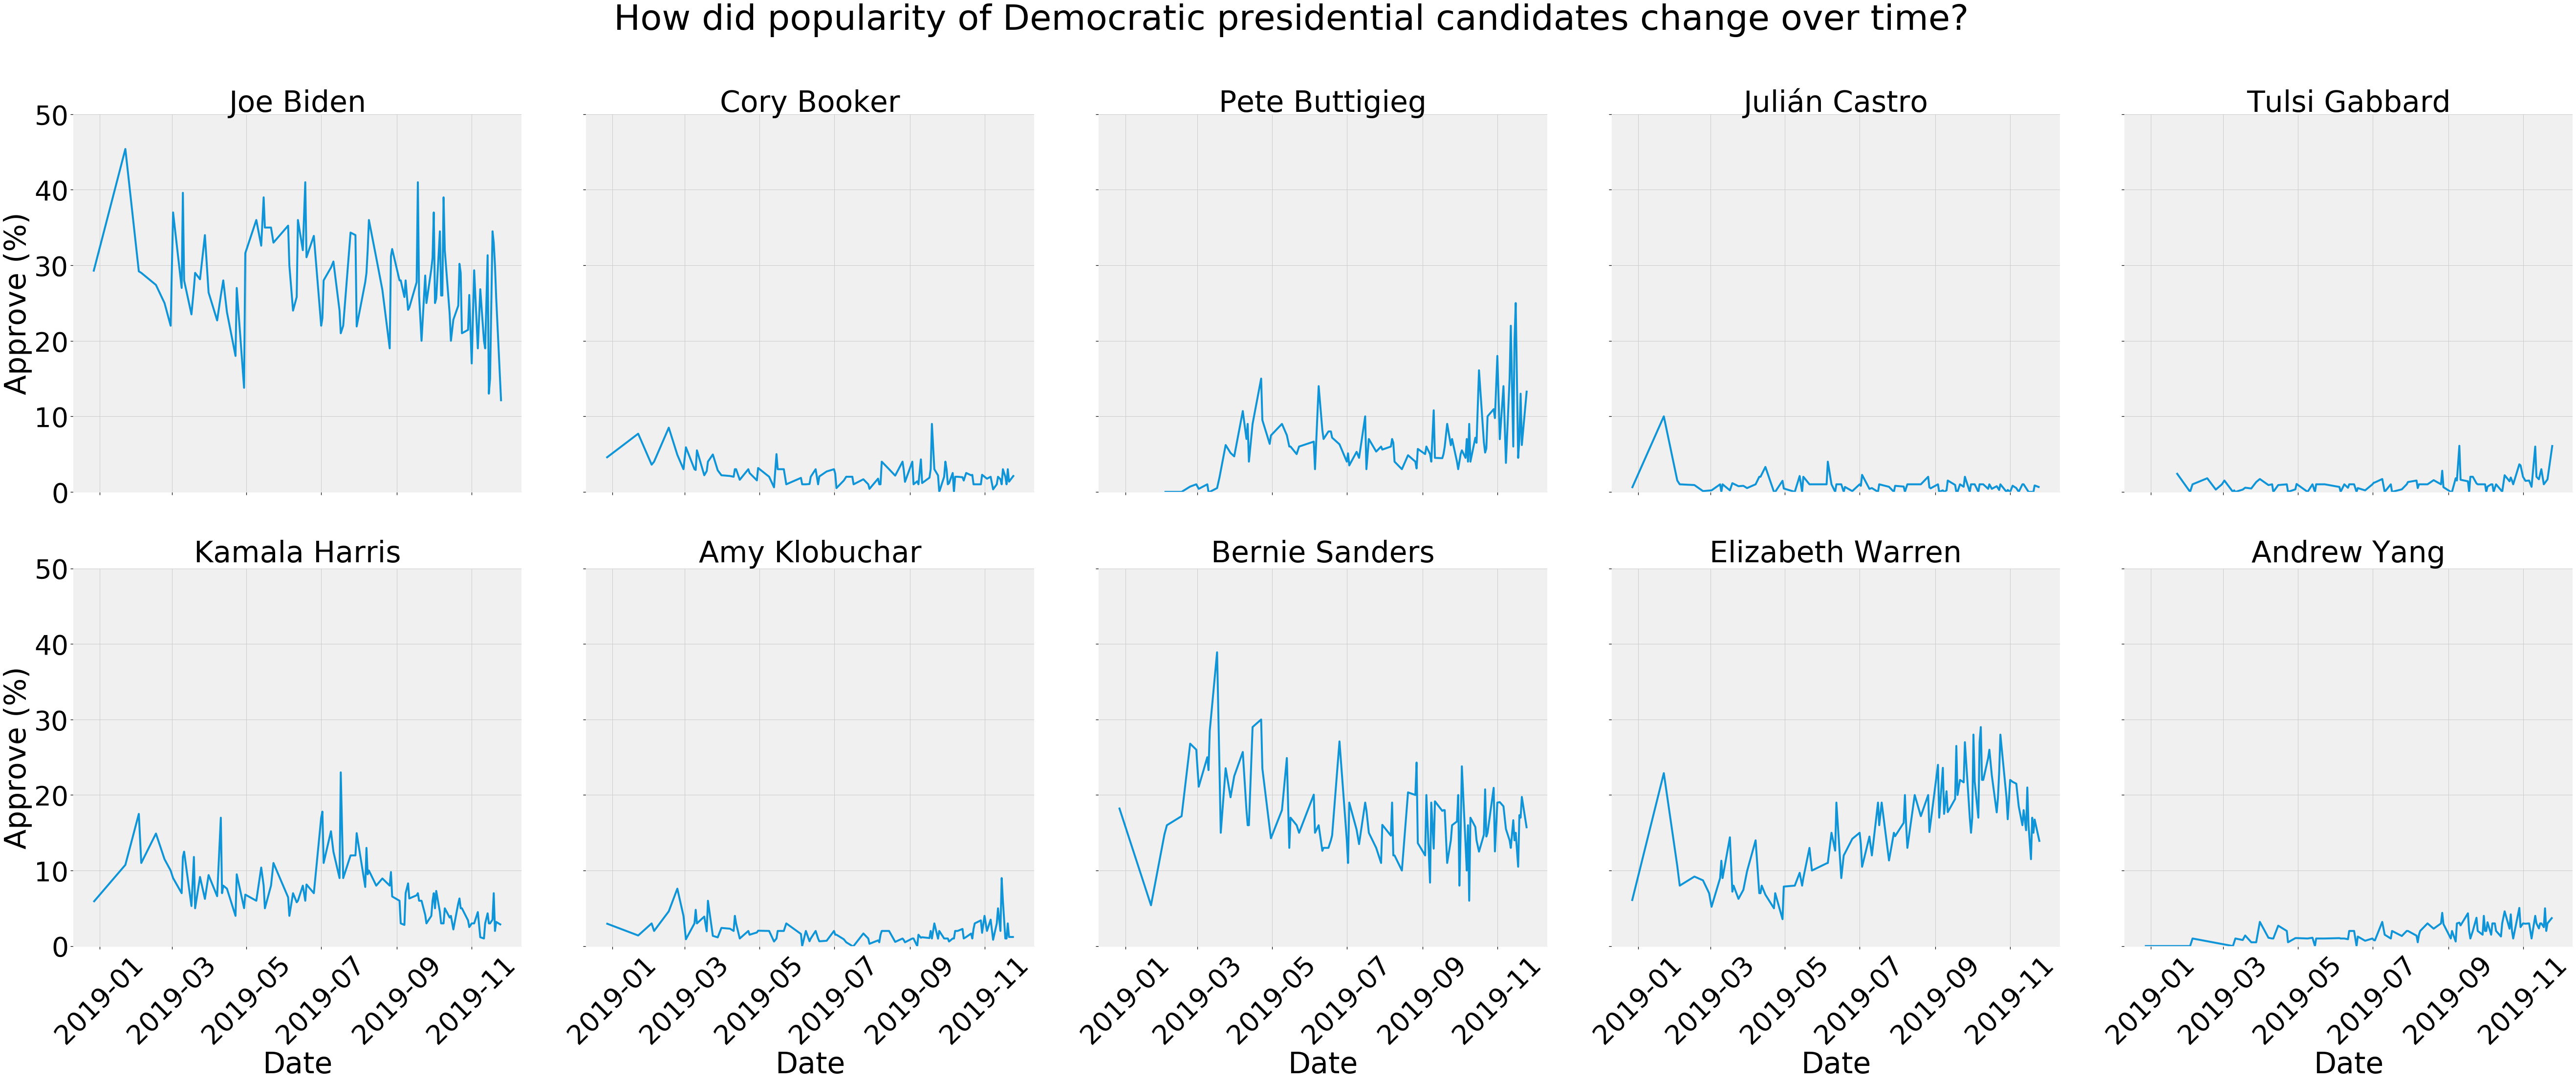

In [4]:
with sns.plotting_context("notebook", font_scale=5):

    # Basic plots
    g = sns.FacetGrid(polls, col="candidate_name", col_wrap=5, height=15, ylim=(0, 50))

    g.map(sns.lineplot, "created_at", "pct", linewidth=4, color="#0F95D7", ci=None)

    # Rename grid by each candiate's name
    axes = g.axes.flatten()

    names = [
        "Joe Biden",
        "Cory Booker",
        "Pete Buttigieg",
        "Julián Castro",
        "Tulsi Gabbard",
        "Kamala Harris",
        "Amy Klobuchar",
        "Bernie Sanders",
        "Elizabeth Warren",
        "Andrew Yang",
    ]

    for i, c in enumerate(names):
        axes[i].set_title(c)

    # Rename x-axis
    for ax in axes:
        ax.set_xlabel("Date")

    # Rename y-axis
    for ax in axes:
        ax.set_ylabel("Approve (%)")

    # Adjust x-ticks
    for ax in g.axes:
        _ = plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

    # Nicer spacing
    g.fig.tight_layout()

    # Add title
    plt.suptitle(
        "How did popularity of Democratic presidential candidates change over time?",
        y=1.05,
    )

    # Save plot
    g.savefig("polls.png")

Since the beginning of this year, five candidates are leading the race: Joe Biden, Elizabeth Warren, Bernie Sanders, Kamala Harris, and Pete Buttigieg. Other candidates have never polled above 10%. For the five front-runners, we can plot their support rates since June 2019 (the first debate took place on June 26th) and overlay this graph with vertical red lines that indicate the debate dates.

In [5]:
# Names of the 5 front-runners
front_runner_name = [
    "Joseph R. Biden Jr.",
    "Elizabeth Warren",
    "Bernard Sanders",
    "Pete Buttigieg",
    "Kamala D. Harris",
]

# Only select polls made by reputable pollsters for top candiates
front_runners = polls[
    (polls["candidate_name"].isin(front_runner_name))
    & (polls["created_at"] > pd.to_datetime("2019-06-01").date())
]

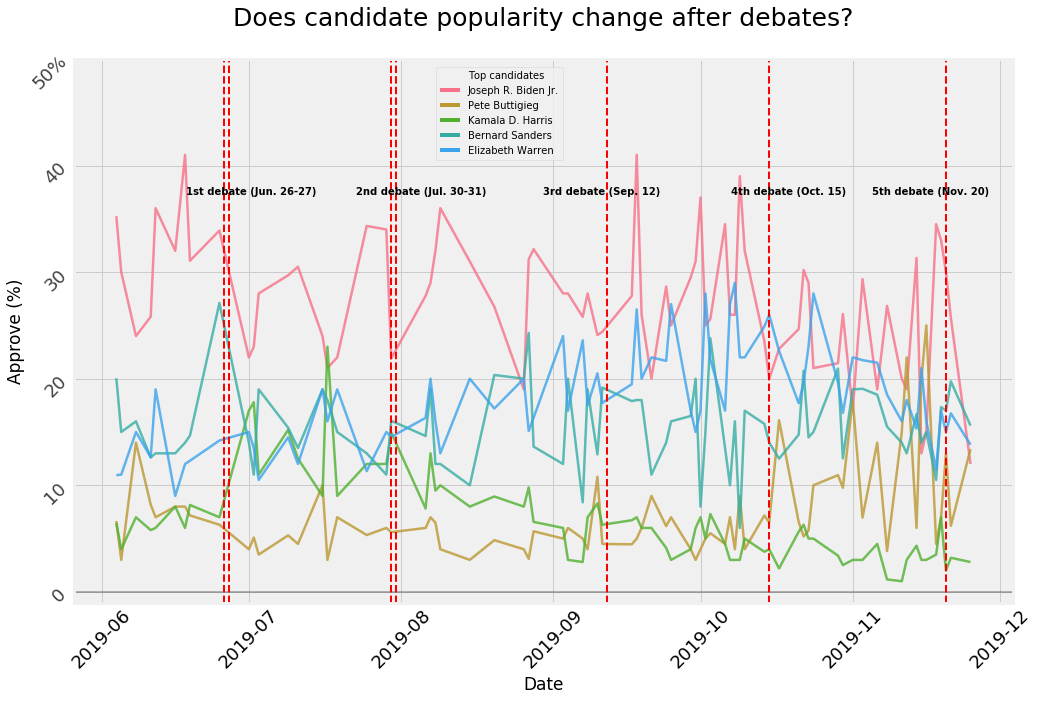

In [6]:
# Set plot size
plt.figure(figsize=(15, 10))

# Choose a high-contrast color palette
sns.set_palette("husl")

# Generate the plot
ax = sns.lineplot(
    x="created_at",
    y="pct",
    hue="candidate_name",
    data=front_runners,
    linewidth=2.5,
    ci=None,
    alpha=0.8,
)

# Adjust axis labels and plot title
plt.xlabel("Date", fontsize=17)

plt.ylabel("Approve (%)", fontsize=17)

plt.title("Does candidate popularity change after debates?", fontsize=25, y=1.05)

ax.set_yticks([0, 10, 20, 30, 40, 50])

ax.set_yticklabels(
    labels=["0", "10", "20", "30", "40", "50%"], fontsize=14, color="#414141"
)

ax.tick_params(axis="both", which="major", labelsize=18, rotation=45)

# Move legend to the middle and change legend text
legend = ax.legend(loc="center left", bbox_to_anchor=(0.38, 0.9), ncol=1)

legend.texts[0].set_text("Top candidates")

# Bolded horizontal line at y = 0
ax.axhline(y=0, color="#414141", linewidth=1.5, alpha=0.5)

# Mark debate dates
ax.axvline(pd.to_datetime("2019-06-26"), color="r", linestyle="--", lw=2)

ax.axvline(pd.to_datetime("2019-06-27"), color="r", linestyle="--", lw=2)

ax.text(
    0.12,
    0.75,
    "1st debate (Jun. 26-27)",
    horizontalalignment="left",
    size="medium",
    color="black",
    weight="semibold",
    transform=ax.transAxes,
)

ax.axvline(pd.to_datetime("2019-07-30"), color="r", linestyle="--", lw=2)

ax.axvline(pd.to_datetime("2019-07-31"), color="r", linestyle="--", lw=2)

ax.text(
    0.3,
    0.75,
    "2nd debate (Jul. 30-31)",
    horizontalalignment="left",
    size="medium",
    color="black",
    weight="semibold",
    transform=ax.transAxes,
)

ax.axvline(pd.to_datetime("2019-09-12"), color="r", linestyle="--", lw=2)

ax.text(
    0.5,
    0.75,
    "3rd debate (Sep. 12)",
    horizontalalignment="left",
    size="medium",
    color="black",
    weight="semibold",
    transform=ax.transAxes,
)


ax.axvline(pd.to_datetime("2019-10-15"), color="r", linestyle="--", lw=2)

ax.text(
    0.7,
    0.75,
    "4th debate (Oct. 15)",
    horizontalalignment="left",
    size="medium",
    color="black",
    weight="semibold",
    transform=ax.transAxes,
)


ax.axvline(pd.to_datetime("2019-11-20"), color="r", linestyle="--", lw=2)

ax.text(
    0.85,
    0.75,
    "5th debate (Nov. 20)",
    horizontalalignment="left",
    size="medium",
    color="black",
    weight="semibold",
    transform=ax.transAxes,
)


plt.show()

Some candidates' popularity seems to change more dramatically after debates compared to other candidates. For instance, Joe Biden's popularity dropped sharply after the first and the fifth debates and increased sharply after the second, third, and fourth. Pete Buttigieg's popularity, however, didn't seem to change much after the first three debates. Interestingly, after Harris confronted Biden about his racial record in the second debate, the latter's popularity went up while the former's went down, which might be the exact opposite of what you'd expect.

Again, it's hard to make causal claims about the impact of debates from the polls. Below I proposed a controlled experiment to achieve this goal.

## Experiment Proposal

### Research Question
**Do presidential debates influence voters' attitude towards candidates?** 

To answer this question more specifically, I will look at whether watching the sixth Democratic primary debate on Dec. 19th, 2019 changes voters' evaluation of Democratic candidates.

### Methods

#### Rollout plan 
A week before Dec. 19th, 2019, postcards with experiment invitations will be delivered to 10,000 addresses randomly chosen from the U.S. Postal Service's Delivery Sequence File. This method is called "address-based sampling" (ABS), a popular technique in election polling (e.g., see [Pew Research Center](https://www.pewresearch.org/fact-tank/2019/02/27/what-our-transition-to-online-polling-means-for-decades-of-phone-survey-trends/) for an introduction).Each postcard has a URL and a QR code, both of which take respondents to a brief survey asking about their demographic information (race, age, gender, eduction, income, etc.), political attitudes and values, attitude ("don't know", "neutral", "negative", "positive", etc.) towards each debate candidate, the likelihood of each candidate being elected, etc..

After finishing the survey, respondents can choose to participate in a 3-hour study on Dec. 19 or opt out. Those who give their consent will be asked to provide their contact information (phone and email) and told to receive a study link via email soon. One hour before the debate, participants will receive a text message alert about the study. About 10 minutes before the debate, participants will receive the study link.

#### A/B manipulation 

Those who content to participate will be randomly assigned to one of the two conditions —

- **Experiment condition (A)**: Participants receive a link that takes them to watch a live stream of the sixth Democratic primary debate. 
- **Control condition (B)**: Participants receive a link that takes them to watch a pre-recorded football game that lasts about the same length as the debate (usually 3 hours).

Participants are asked to watch the entire video and told that they will be paid 30 dollars later. Closing the browser automatically terminates the experiment. In the end, participants will be asked to rate each candidate's (or player's) performance, list memorable moments from the debate (or the game), and, once again, rate their attitude towards each Democratic candidate and guess the probability of each candidate being elected.

#### Metrics to monitor on
- **Key metric:** Changes in participants' attitudes towards each candidate after watching the debate.
- **Secondary metrics**
    - Demographic information of participants
    - Performance rating of each candidate as well as changes after the experiment 
    - Participants' political attitudes and values
    - Memorable moments during the experiment 
    - The estimated probability of each Democratic candidate being elected

### Predictions
Generally speaking, I expect participants' attitudes towards Democratic candidates to change more after watching the sixth debate (the experiment condition) than watching an irrelevant football game (the control condition). I have similar expectations about changes in the likelihood of each candidate being elected (in the participants' eyes). 

The direction and the magnitude of change may further depend on each candidate's debate performance (rated by participants), whether a candidate has memorable moments in a good or a bad way, the participant's own political views, and so on. 

Since it's quite effortful to participate in this study, we need to be aware whether the final sample is representative. We can check this by comparing the demographics of those who filled out the survey and those who finished the experiment to see if certain (racial, age, gender, etc.) groups are more likely to drop out. If biases exist, we should be cautious when generalizing the results to a broader population.